In [1]:
from matplotlib import pyplot as plt
import numpy as np
import os
import math

In [2]:
def readfile(name, run_avg_length, use_filter=False):
    reader = open(name, 'r')
    reader.readline()
    iter_list = []
    value_list = []
    run_avg = 0
    run_avg_size = 0
    while True:
        line = reader.readline().split(',')
        if len(line) < 3:
            break
        
        if use_filter and run_avg_size * 2 > run_avg_length and abs(float(line[2]) - run_avg) > 1.0:
            continue
        new_run_avg = (run_avg * run_avg_size + float(line[2])) / (run_avg_size + 1.0)
        
        iter_list.append(int(line[1]))
        value_list.append(new_run_avg)
        if run_avg_size < run_avg_length:
            run_avg_size += 1
        run_avg = new_run_avg
    return iter_list, value_list

In [3]:
mi_name = 'run_.,tag_loss_nll.csv'
nll_name = 'run_.,tag_true_nll.csv'
folder = 'notes/raw_data/'
run_names = ['kl0.1-unbounded/', 'kl0.1-bounded', 'kl0.2-unbounded/', 'kl0.2-bounded', 'kl1.0-unbounded']
labels = [r'$\beta$=0.1', r'$\beta=0.1$-bounded', r'$\beta=0.2$', r'$\beta=0.2$-bounded', r'$\beta=1.0$']
linestyles = ['-', ':', '-', ':', '-']
mi_iters, mi_values = [], []
nll_iters, nll_values = [], []
for name in run_names:
    mi_iter, mi_value = readfile(os.path.join(folder, name, mi_name), 10, use_filter=True)
    nll_iter, nll_value = readfile(os.path.join(folder, name, nll_name), 10)
    mi_iters.append(mi_iter)
    mi_values.append(mi_value)
    nll_iters.append(nll_iter)
    nll_values.append(nll_value)

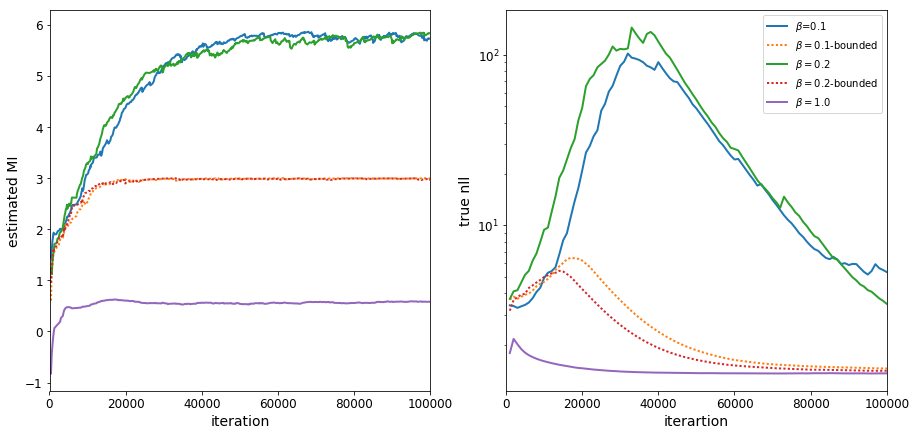

In [7]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(h=7, w=15)
for i in range(len(run_names)):
    ax[0].plot(mi_iters[i], [-value for value in mi_values[i]], label=labels[i], linewidth=2, linestyle=linestyles[i])
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('estimated MI')
ax[0].set_xlim([100, 100000])
for i in range(len(run_names)):
    ax[1].plot(nll_iters[i], nll_values[i], label=labels[i], linewidth=2, linestyle=linestyles[i])
ax[1].set_xlabel('iterartion')
ax[1].set_ylabel('true nll')
ax[1].set_yscale('log')
ax[1].set_xlim([100, 100000])
ax[1].legend()
# ax[1].legend.set_fontsize(14)
for i in range(2):
    ax[i].xaxis.label.set_fontsize(14)
    ax[i].yaxis.label.set_fontsize(14)
    for item in ax[i].get_xticklabels() + ax[i].get_yticklabels():
        item.set_fontsize(12)
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ):
#     item.set_fontsize(20)
plt.show()